In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [37]:
df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto29/Cuarentenas-Totales.csv?raw=true',
                    sep=',')
#lectura dataframe cuarentena 

In [38]:
df.head()

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13


In [40]:
df2 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true',
                    sep=',')
#Lectura 2 dataframe

In [41]:
df2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN


In [44]:
df22 = df2[['Region','Codigo region','Codigo comuna','Comuna','Poblacion']]

In [45]:
df22.head()

,Region,Codigo region,Codigo comuna,Comuna,Poblacion
0,Arica y Parinacota,15,15101.0,Arica,247552.0
1,Arica y Parinacota,15,15102.0,Camarones,1233.0
2,Arica y Parinacota,15,15202.0,General Lagos,810.0
3,Arica y Parinacota,15,15201.0,Putre,2515.0
4,Arica y Parinacota,15,NaN,Desconocido Arica y Parinacota,NaN


In [47]:
df22=df22.dropna()
#Eliminacion de los nulos

In [48]:
df22['Codigo comuna']=df22['Codigo comuna'].astype(int)

In [53]:
df.drop(['Detalle','Superficie en m2','Perímetro en m','Alcance'], axis=1, inplace=True)


In [54]:
df.head()

,ID,Nombre,Estado,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Region,n_REGION
0,1,Arica,Histórica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15,R15
1,2,Santiago Norte,Histórica,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13,R13
2,3,Puente Alto Poniente,Histórica,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,13,R13
3,4,El Bosque,Histórica,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,13,R13
4,5,San Bernardo Nororiente,Histórica,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,13,R13


In [56]:
df22 = df2[['Comuna','Codigo region','Codigo comuna','Poblacion','Region']]

In [57]:
df22.head()

,Comuna,Codigo region,Codigo comuna,Poblacion,Region
0,Arica,15,15101.0,247552.0,Arica y Parinacota
1,Camarones,15,15102.0,1233.0,Arica y Parinacota
2,General Lagos,15,15202.0,810.0,Arica y Parinacota
3,Putre,15,15201.0,2515.0,Arica y Parinacota
4,Desconocido Arica y Parinacota,15,NaN,NaN,Arica y Parinacota


In [67]:
df=df.rename(columns={'Código CUT Comuna':'Codigo comuna'})

In [68]:
df.head()

,ID,Nombre,Estado,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,n_REGION
0,1,Arica,Histórica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15,R15
1,2,Santiago Norte,Histórica,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13,R13
2,3,Puente Alto Poniente,Histórica,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,13,R13
3,4,El Bosque,Histórica,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,13,R13
4,5,San Bernardo Nororiente,Histórica,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,13,R13


In [71]:
df=df.merge(df22, on='Codigo comuna') ##Mezcla de los 2 dataframe para poder realizar los graficos

In [75]:
region1=df.where(df['Codigo region'] ==1)
region2=df.where(df['Codigo region'] ==2)
region3=df.where(df['Codigo region'] ==3)
region4=df.where(df['Codigo region'] ==4)
region5=df.where(df['Codigo region'] ==5)
region6=df.where(df['Codigo region'] ==6)
region7=df.where(df['Codigo region'] ==7)
region8=df.where(df['Codigo region'] ==8)
region9=df.where(df['Codigo region'] ==9)
region10=df.where(df['Codigo region'] ==10)
region11=df.where(df['Codigo region'] ==11)
region12=df.where(df['Codigo region'] ==12)
region13=df.where(df['Codigo region'] ==13)
region14=df.where(df['Codigo region'] ==14)
region15=df.where(df['Codigo region'] ==15)
region16=df.where(df['Codigo region'] ==16)

In [76]:
region1=region1.dropna()
region2=region2.dropna()
region3=region3.dropna()
region4=region4.dropna()
region5=region5.dropna()
region6=region6.dropna()
region7=region7.dropna()
region8=region8.dropna()
region9=region9.dropna()
region10=region10.dropna()
region11=region11.dropna()
region12=region12.dropna()
region13=region13.dropna()
region14=region14.dropna()
region15=region15.dropna()
region16=region16.dropna()

In [83]:
region1

,ID,Nombre,Estado,Fecha de Inicio,Fecha de Término,Codigo comuna,Region_x,n_REGION,Comuna,Codigo region,Poblacion,Region_y
77,57.0,Alto Hospicio,Histórica,2020-05-15 22:00:00,2020-10-03 05:00:00,1107.0,1.0,R01,Alto Hospicio,1.0,129999.0,Tarapacá
78,58.0,Iquique,Histórica,2020-05-15 22:00:00,2020-10-03 05:00:00,1101.0,1.0,R01,Iquique,1.0,223463.0,Tarapacá
93,80.0,Pozo Almonte (Radio Urbano),Histórica,2020-06-12 22:00:00,2020-09-28 05:00:00,1401.0,1.0,R01,Pozo Almonte,1.0,17395.0,Tarapacá


<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

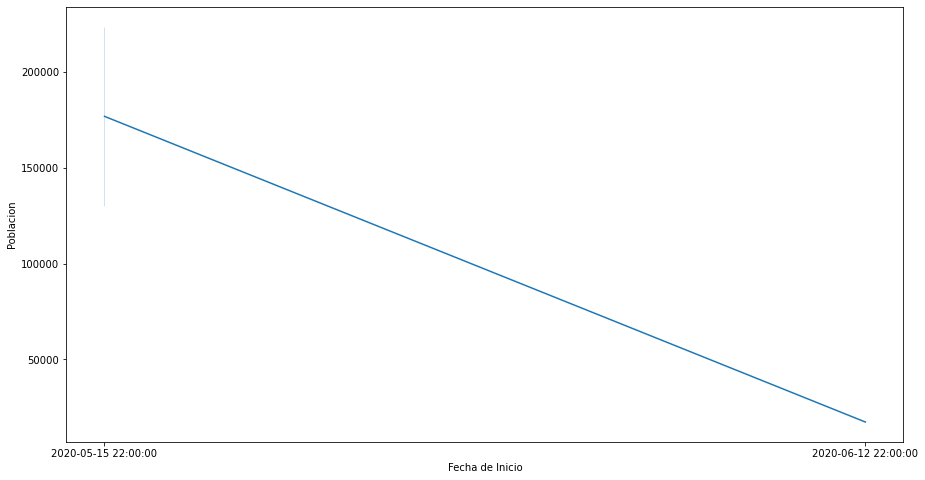

In [82]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region1)
#En la region1 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-05-15

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

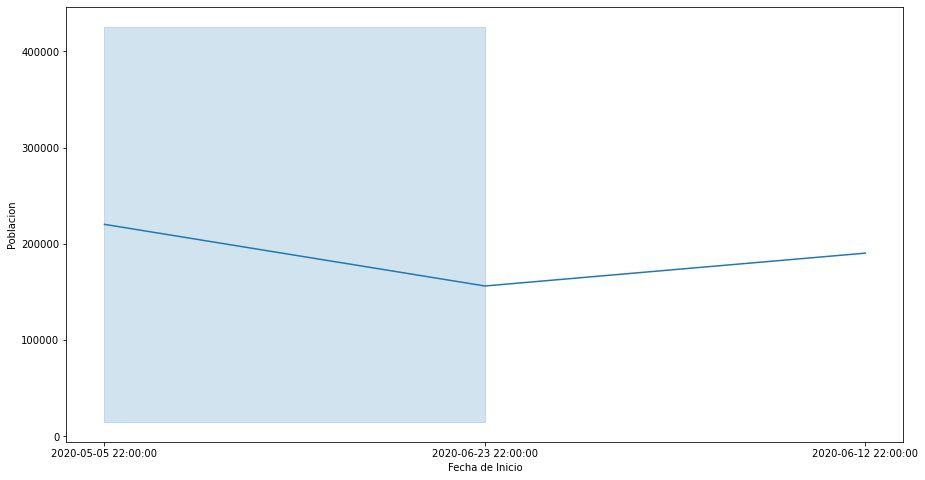

In [84]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region2)
#En la region2 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-05-05

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

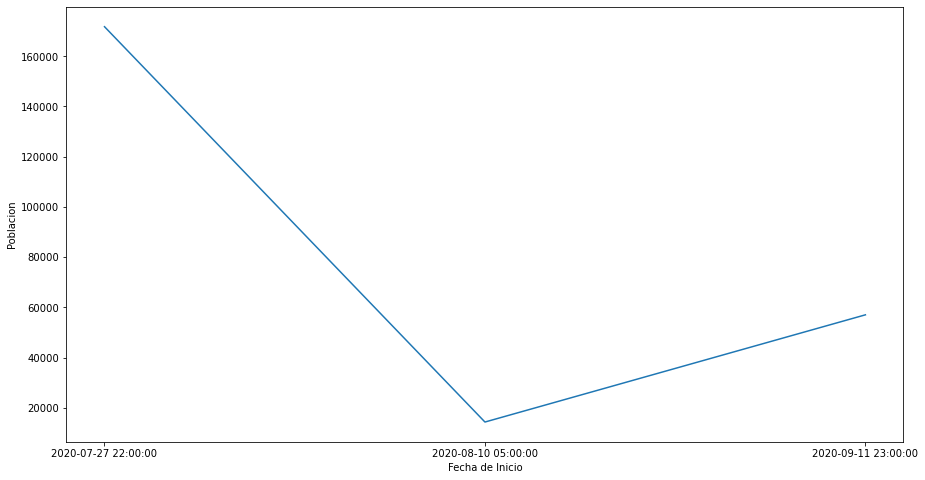

In [85]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region3)
#En la region3 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-07-27

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

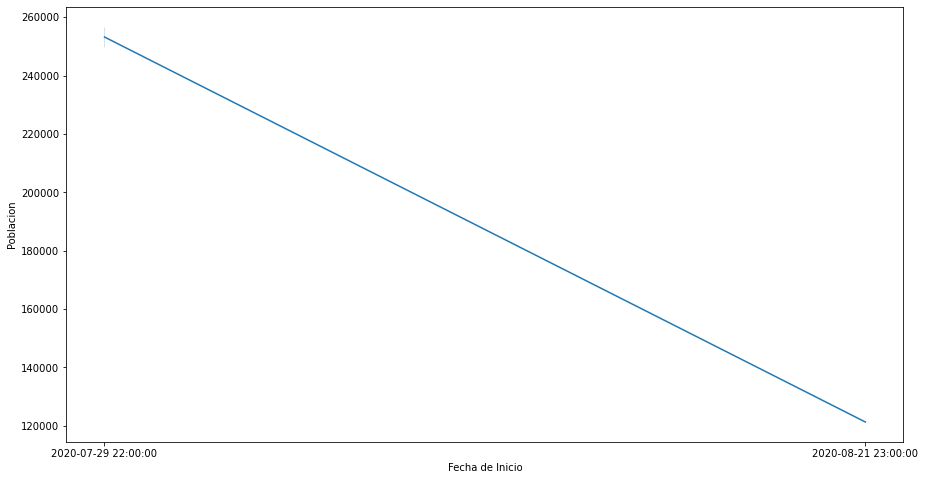

In [86]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region4)
#En la region4 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-07-29

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

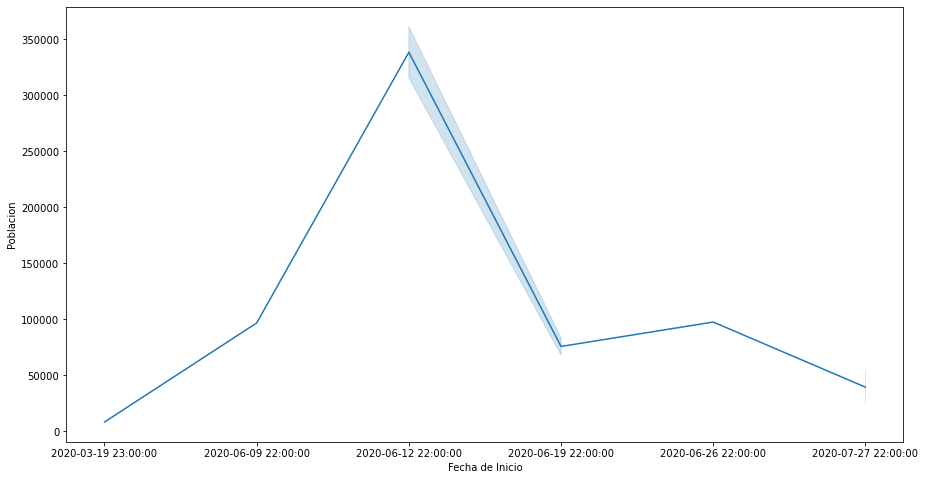

In [87]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region5)
#En la region5 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-07-29

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

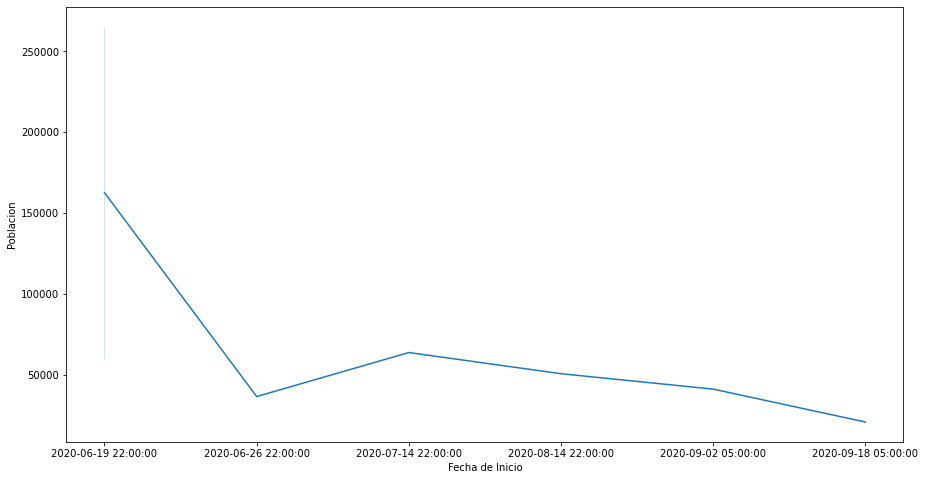

In [88]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region6)
#En la region6 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-06-19

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

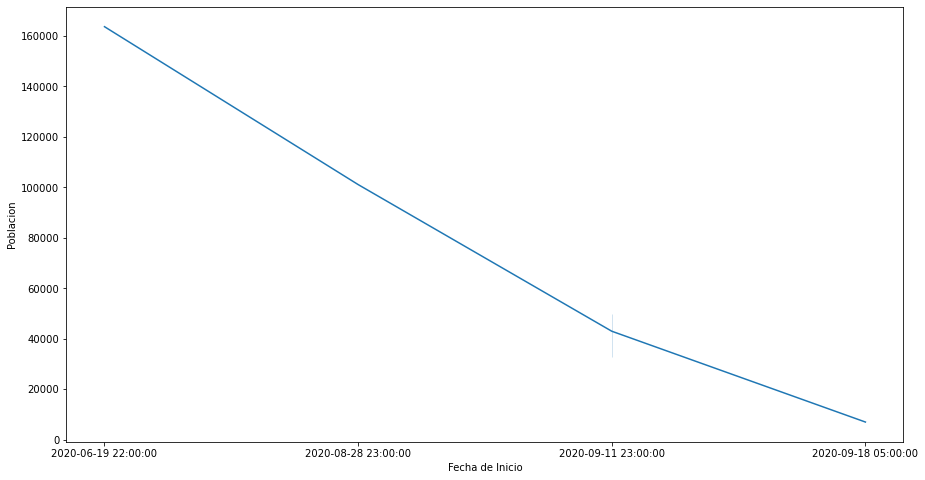

In [89]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region7)
#En la region7 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-06-19

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

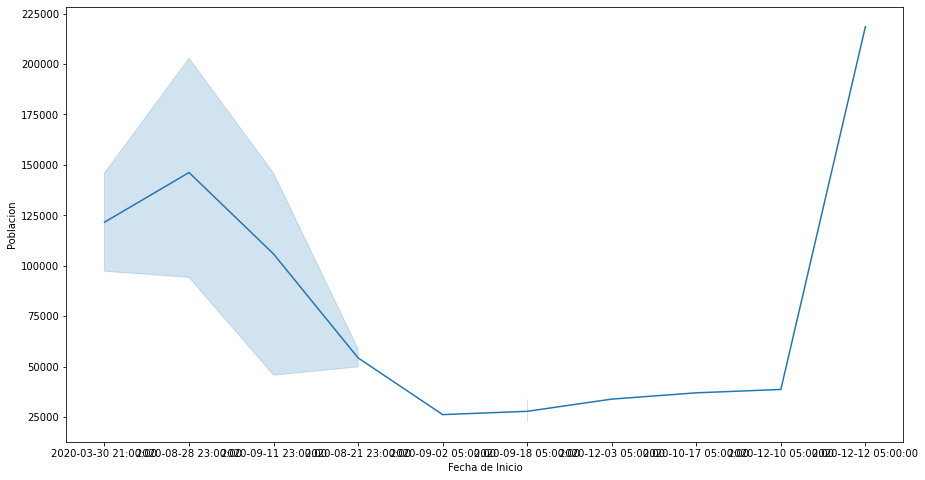

In [90]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region8)
#En la region8 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-12-12

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

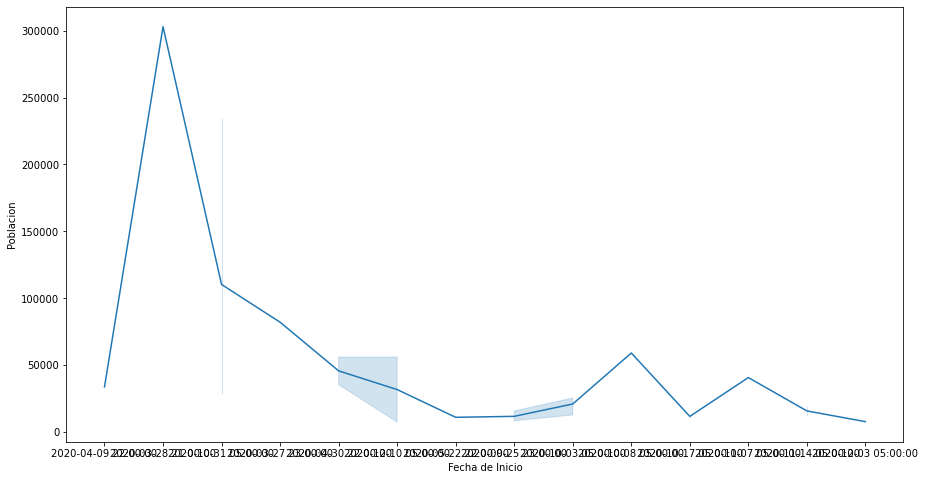

In [91]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region9)
#En la region9 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-04-09

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

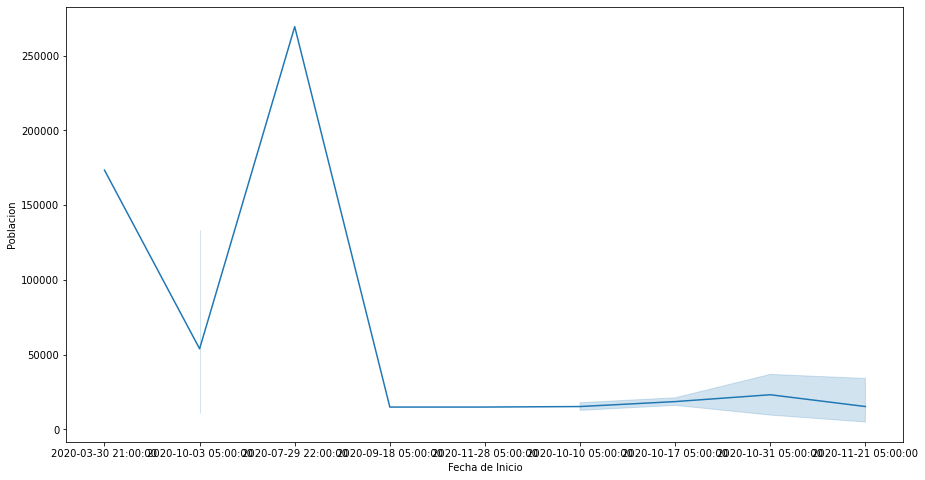

In [99]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region10)
#En la region10 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-07-29

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

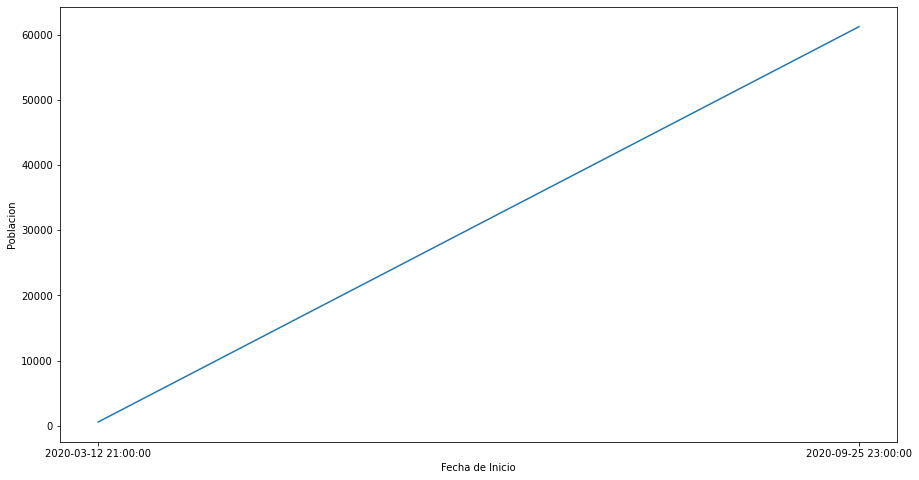

In [93]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region11)
#En la region11 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-09-25

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

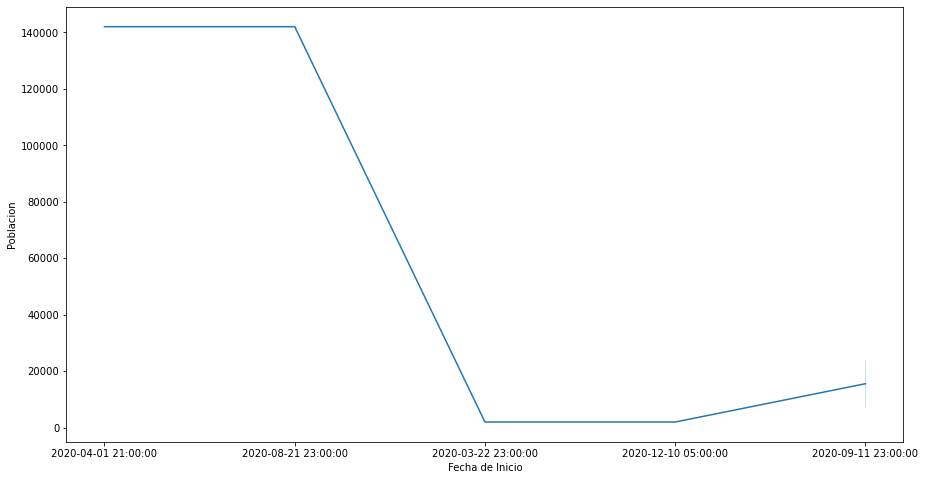

In [94]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region12)
#En la region12 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-08-21

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

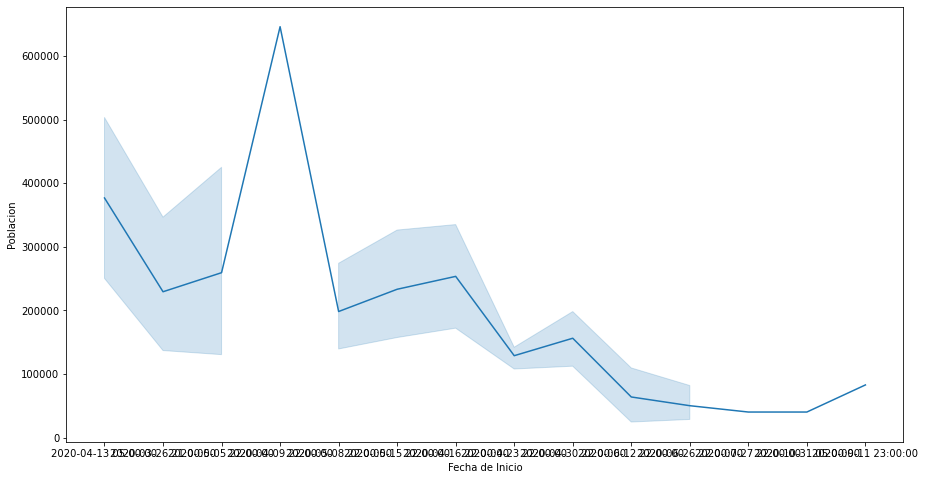

In [95]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region13)
#En la region13 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-09-09

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

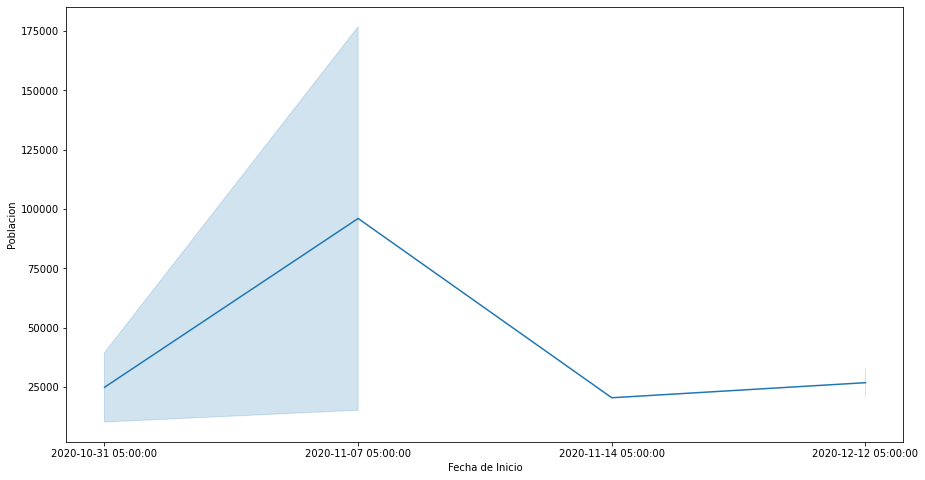

In [96]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region14)
#En la region14 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-11-07

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

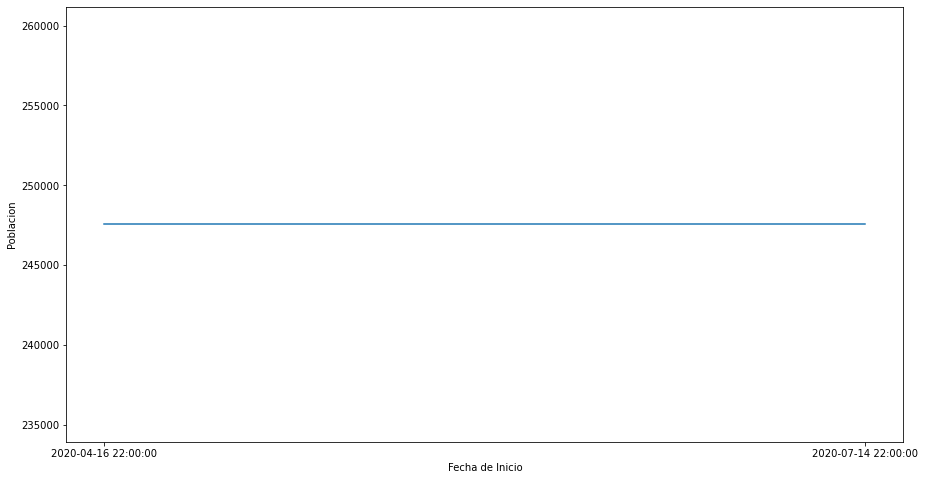

In [97]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region15)
#En la region15 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-05-15

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

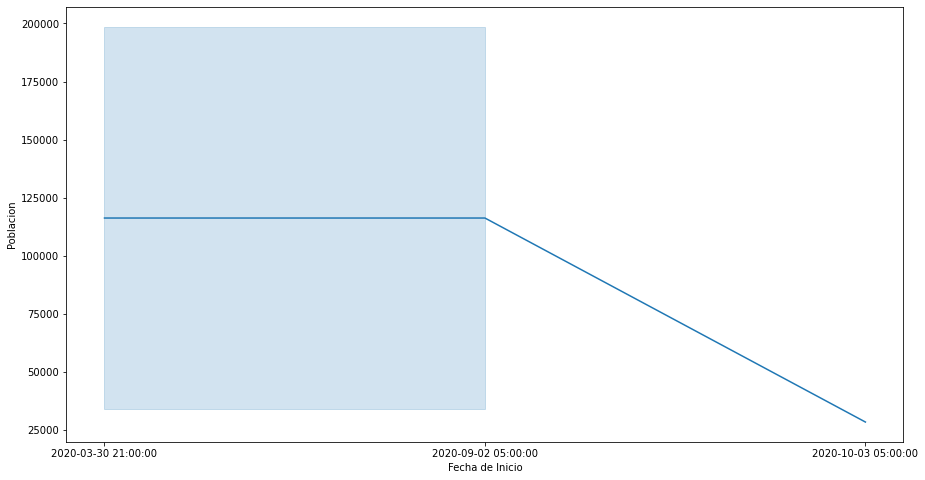

In [98]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha de Inicio' , y = 'Poblacion',data = region16)
#En la region16 el dia que hubo la mayor cantidad de personas en cuarentena es el 2020-09-02

In [ ]:
#El dia que hubo la mayor cantidad de personas en cuarentena en el pais es el 2020-09-09 correspondiente a la region 13, segun los datos
#obtenidos por el ministerio de ciencia correspondiente al año 2020, dejando a fuera el año actual 2021.